# Project

Author: Norbert Antal
<br>

### Project description

This project explores the PlantGrowth dataset using statistical analysis techniques, including t-tests and ANOVA, to identify significant differences between treatment groups. 

### Project brief
Complete the project in a single notebook called project.ipynb in your repository. The same style should be used as detailed above: explanations in MarkDown and code comments, clean code, and regular commits. Use plots as appropriate.

In this project, you will analyze the PlantGrowth R dataset. You will find a short description of it on Vicent Arel-Bundock's Rdatasets page. The dataset contains two main variables, a treatment group and the weight of plants within those groups.

The aim is to perform t-tests and ANOVA on this dataset while describing the dataset and explaining your work. <br>

#### Project tasks:

Download and save the dataset to your repository.

Describe the data set in the notebook.

Describe what a t-test is, how it works, and what the assumptions are.

Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.

Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.

Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.

In [86]:
# import required modules
import pandas as pd # dataframe operations
import matplotlib.pyplot as plt # visualisation
import seaborn as sns # visualisation
from scipy import stats # statistical tests

# 1. Acquire data
Data downloaded and stored in the `\data` folder. 

## 1.1 Introduction of data
The dataset used in this project was provided by the lecturer, with the original source available on Vincent Arel-Bundock's Rdatasets page on GitHub [1].

The `PlantGrowth` dataset comes from an experiment designed to compare plant yields, measured as dried weights, obtained under a control and two different treatment conditions. It includes a control group (`ctrl`) and two treatment groups (`trt1` and `trt2`). The dataset contains 30 observations with two variables:
- **weight (numeric):** The dried weight of plants.
- **group (factor):** The experimental group (control or treatment).

This dataset forms the basis for investigating the effects of treatment conditions on plant growth. It was originally sourced in Dobson's *An Introduction to Statistical Modelling* (1983) [2].

###### [1]: Github.io. (2024). R: Results from an Experiment on Plant Growth. [online] Available at: https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html.<br>[2] Dobson, A.J., 2013. Introduction to statistical modelling. Springer.

## 1.2 Data Cleaning and Summary Analysis

In [87]:
# Read in data to dataframe
df = pd.read_csv("data/plantgrowth.csv")
#df.head()
print(df.dtypes)

rownames      int64
weight      float64
group        object
dtype: object


The dataset contains 30 observations with the following columns:

- **weight** (`float64`): Represents dried plant weights.
- **group** (`object`): Categorical variable indicating the experimental group (`ctrl`, `trt1`, `trt2`).

The `rownames` column (`int64`) serves as a row identifier and can be dropped as it does not hold analytical value.


In [ ]:
# drop irrelevant rownames column
df.drop(columns=['rownames'], inplace=True)
# Summary statistics
print(df.head())
df.describe()

   weight group
0    4.17  ctrl
1    5.58  ctrl
2    5.18  ctrl
3    6.11  ctrl
4    4.50  ctrl


,weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


The dataframe created from `PlantGrowth` dataset contains 30 observations with the following columns:
- **weight** (`float64`): Dried plant weights with:
  - **Mean:** 5.073, **Std Dev:** 0.701  
  - **Range:** 3.59 to 6.31  
  - **Median:** 5.155, **IQR:** 4.55–5.53
- **group** (`object`): Categorical variable for the groupnames

Summary statistics by groups may be relevant

In [ ]:
#Summary statistics by group
df.groupby('group').describe()

weight                                                    
       count   mean       std   min     25%    50%     75%   max
group                                                           
ctrl    10.0  5.032  0.583091  4.17  4.5500  5.155  5.2925  6.11
trt1    10.0  4.661  0.793676  3.59  4.2075  4.550  4.8700  6.03
trt2    10.0  5.526  0.442573  4.92  5.2675  5.435  5.7350  6.31

Each group (`ctrl`, `trt1`, `trt2`) has 10 observations of plant weights;

- **ctrl**: Mean = 5.03, Std Dev = 0.58, Range = 4.17–6.11  
- **trt1**: Mean = 4.66, Std Dev = 0.79, Range = 3.59–6.03  
- **trt2**: Mean = 5.53, Std Dev = 0.44, Range = 4.92–6.31  

Key differences are observed in mean weights and variability among groups.


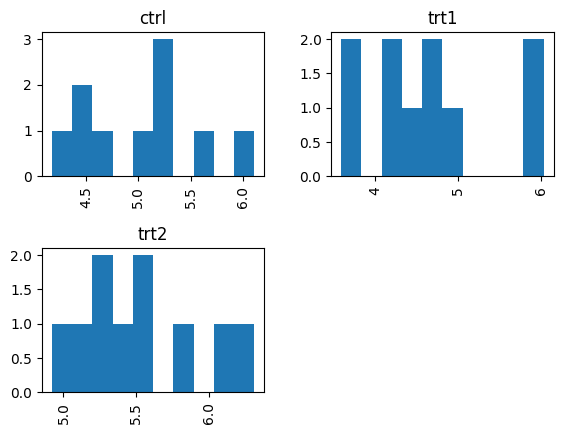

In [90]:
# visualise data by groups with histogram ref: https://www.statology.org/pandas-histogram-by-group/
df['weight'].hist(by=df['group'])
plt.show()

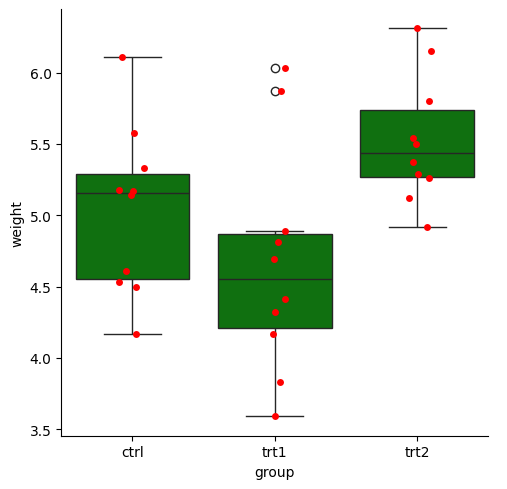

In [91]:
# visualise data by groups with boxplot and catplot ref: https://www.statology.org/pandas-histogram-by-group/
sns.catplot(data=df, x='group', y=df.columns[0], color="red")
sns.boxplot(data=df, x='group', y=df.columns[0], color="green")
plt.show()


The grouped histogram visualisation of the `weight` variable is inconclusive regarding the spread of the data due to the small sample size. However, the box and scatterplots indicate clear distinction between the groups.

### Describe what a t-test is, how it works, and what the assumptions are.

 A t-test is a statistical test to determine if there is a significant difference between two samples by testing whether the means of the two samples are significantly different or not. It was originally developed by William Sealy Gosset at the Guinness Brewing Company to measure the consistent quality of stout.<br>
 The test compares the means of two groups, calculates a t-statistic to assess if the null hypothesis (no difference) holds, and uses the resulting p-value to determine statistical significance against a chosen threshold (commonly; 0.05).[1]<br>
 Assumptions for t-test include the measured values in ratio scale or interval scale, simple random extraction, homogeneity of variance, appropriate sample size, and normal distribution of data.[2]<br>
 
 There are three main types of t-test:
+ An Independent Samples t-test compares the means for two separate groups.
+ A Paired sample t-test compares means from the same group at different times or different conditions.
+ A One sample t-test tests the mean of a single group against a known mean.[3]

In the case of the `PlantGrowth` dataset, an Independent Samples t-test is the most appropriate as the data is collected from different plants with different treatments applied. In python, scipy's `ttest_ind()` function is a commonly used for Independent Smaples t-test. This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.[4]

 ###### [1]: Maverick, J.B. (2021). What assumptions are made when conducting a t-test? [online] Investopedia. Available at: https://www.investopedia.com/ask/answers/073115/what-assumptions-are-made-when-conducting-ttest.asp.<br>[2]: Kim, T.K. and Park, J.H. (2019). More about the basic assumptions of t-test: normality and sample size. Korean Journal of Anesthesiology, [online] 72(4), pp.331–335. doi:https://doi.org/10.4097/kja.d.18.00292.<br>[3]: Glen, S. (2022). Independent Samples T Test: Definition, Excel & SPSS Steps. [online] Statistics How To. Available at: https://www.statisticshowto.com/probability-and-statistics/t-distribution/independent-samples-t-test/.[4]: docs.scipy.org. (n.d.). scipy.stats.ttest_ind — SciPy v1.4.1 Reference Guide. [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html.

As the t-test assumes that the data consists of measured values on a ratio scale and is normally distributed, it is important to verify these assumptions. Previously, `weight`, as the only measured ratio variable in the dataset, was visualised with histograms. However, due to the small sample size, the histogram did not provide a definitive indication, so a statistical method is required instead. The Shapiro-Wilk test is used to determine whether a dataset is normally distributed. In it, the null hypothesis states that the data follows a normal distribution. If the p-value is less than the chosen significance level (typically 0.05), the null hypothesis is rejected, indicating that the data is not normally distributed. [1]<br>
As the aim is to compare groups `trt1` and `trt2`, the Shapiro test will have to be done separately for each group as well.

###### [1]: Shapiro–Wilk test, Wikipedia, ref: https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

In [92]:
# Check normal distribution with Shapiro-Wilk test
groups = df['group'].unique()  # Get group names
# Carry out shapiro test for each group
for group in groups:
    group_data = df[df['group'] == group]['weight']
    shapiro = stats.shapiro(group_data)
    print(f"Group {group}:, {shapiro}")

Group ctrl:, ShapiroResult(statistic=0.9566815495491028, pvalue=0.7474744915962219)
Group trt1:, ShapiroResult(statistic=0.9304108619689941, pvalue=0.451945960521698)
Group trt2:, ShapiroResult(statistic=0.941005289554596, pvalue=0.5642533898353577)


The null hypothesis of the Shapiro-Wilk test states that the data is normally distributed. For all three groups (`ctrl`, `trt1`, `trt2`), the p-values are well above 0.05. Therefore, we fail to reject the null hypothesis, indicating that the `weight` variable for each group can be considered normally distributed. This satisfies the normality assumption required for conducting a t-test.


### Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2

In [93]:
# Independent t-test on patient data using scipy.stats
from scipy.stats import ttest_ind # scipy for t-test
# Perform independent sample t-test for trt1 and trt2 groups using scipy t-test
result = ttest_ind(df[df['group'] == 'trt1']['weight'],df[df['group'] == 'trt2']['weight']) #for independent t-test scipy uses ttest_ind()
#output result
print(result)

TtestResult(statistic=-3.0100985421243616, pvalue=0.0075184261182198574, df=18.0)


#### Output Analysis:
- The `t-statistic` of -3.01 indicates that the mean of `trt1` is significantly lower (hence the negative value) than the mean of `trt2`.
- The `p-value` of 0.0075 is much lower than the commonly used threshold for statistical significance (0.05), likely rejecting of the null hypothesis that there is no difference between the group means.
- The `df` (degrees of freedom) of 18 indicates the total sample size used in this t-test.

##### The results of the t-test suggest that the treatments associated with `trt1` and `trt2` likely had different effects on plant weight, with the weight for `trt1` being significantly lower than that for `trt2`. This finding is supported by the boxplot and scatterplot visualisations.


# -------------------------------------------------------------

Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.

Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.